In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('ggplot')

import nltk

In [4]:
data = pd.read_csv('ukraine_conflict.csv')

In [3]:
df = data[data['language'] == 'en']
df['id'] = pd.Index(range(0, len(df), 1))
df = df.set_index('id')
df.head()

<ipython-input-3-8f0a54ce6cb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = pd.Index(range(0, len(df), 1))


,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
id,,,,,,,,,,,,,,,,,,,,,
0,1546893528218976256,2022-07-12 21:55:31 India Standard Time,2022-07-12,21:55:31,530,1459600109445033990,ejustin46,"E. Justin, Randomer",NaN,Ukraine war worsens food insecurity worldwide:...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1546893503208251393,2022-07-12 21:55:25 India Standard Time,2022-07-12,21:55:25,530,122167302,ing_var,T-вітер з України 🇺🇦,NaN,Sweden considers sending Ukraine Archer system...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1546893476402536454,2022-07-12 21:55:19 India Standard Time,2022-07-12,21:55:19,530,581782217,cliffordribner,Clifford Ribner,NaN,The Brave Ukrainians Fight Back – And We Do Ab...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1546893303584546816,2022-07-12 21:54:38 India Standard Time,2022-07-12,21:54:38,530,122167302,ing_var,T-вітер з України 🇺🇦,NaN,I'm just talking about the fauna of Donetsk re...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1546893107404455936,2022-07-12 21:53:51 India Standard Time,2022-07-12,21:53:51,530,821227993741885441,lukerussell1281,Luke Russell,NaN,"On one hand this should be taken seriously, on...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36576,1543352577890209792,2022-07-03 03:25:03 India Standard Time,2022-07-03,03:25:03,530,1196304745603817472,dissectmarkets,Dissecting the Markets | See pinned tweet,NaN,This fact about the Russian-Ukraine war is why...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
36577,1543352544776392705,2022-07-03 03:24:55 India Standard Time,2022-07-03,03:24:55,530,2255439716,gunterschain,Rob Gunter aka Conejo Blas,NaN,Yo America you catching this?#UkraineRussianWa...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
36578,1543352544684122113,2022-07-03 03:24:55 India Standard Time,2022-07-03,03:24:55,530,3104222776,rebel44cz,Jakub Janovsky,NaN,#UkraineWar: Overview of Russian equipment los...,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


## VADER SENTIMENT SCORING
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
* This uses a "bag of words" approach:
    1. Stop words are removed
    2. Each word is scored and combined to a total score

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
# Run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    t = row['tweet'].lower()
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", t)
    res[i] = sia.polarity_scores(text)

  0%|          | 0/36581 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='left', on='id')
vaders = vaders[['id','neg','neu','pos','compound','tweet']]
vaders = vaders.set_index('id')
vaders

,neg,neu,pos,compound,tweet
id,,,,,
0,0.710,0.290,0.000,-0.8689,Ukraine war worsens food insecurity worldwide:...
1,0.000,1.000,0.000,0.0000,Sweden considers sending Ukraine Archer system...
2,0.198,0.699,0.103,-0.4767,The Brave Ukrainians Fight Back – And We Do Ab...
3,0.116,0.884,0.000,-0.4404,I'm just talking about the fauna of Donetsk re...
4,0.260,0.679,0.060,-0.8225,"On one hand this should be taken seriously, on..."
...,...,...,...,...,...
36576,0.236,0.599,0.165,-0.4588,This fact about the Russian-Ukraine war is why...
36577,0.000,1.000,0.000,0.0000,Yo America you catching this?#UkraineRussianWa...
36578,0.213,0.787,0.000,-0.4019,#UkraineWar: Overview of Russian equipment los...


In [15]:
sentiment = {}
for i, row in tqdm(vaders.iterrows(), total=len(vaders)):
    if ((vaders['neg'][i] > vaders['neu'][i]) & 
        (vaders['neg'][i] > vaders['pos'][i])).any():
        val = 'Negatif'
    elif ((vaders['neu'][i] > vaders['neg'][i]) & 
          (vaders['neu'][i] > vaders['pos'][i])).any():
        val = 'Neutral'
    elif ((vaders['pos'][i] > vaders['neu'][i]) & 
          (vaders['neg'][i] < vaders['pos'][i])).any():
        val = 'Positif'
    else: pass
    
    sentiment[i] = val

  0%|          | 0/36581 [00:00<?, ?it/s]

In [17]:
vaders['sentiment'] = pd.Series(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

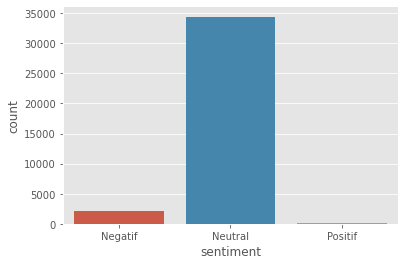

In [19]:
sns.countplot(x='sentiment', data=vaders)

## ROBERTA Pretrained Model
* Use a model trained of a large corpus of data.
* Transformer model accounts for the words but alse the context related to other words.

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
mod = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(mod)
model = AutoModelForSequenceClassification.from_pretrained(mod)

In [36]:
# Build Roberta Model

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    }
    return scores

In [37]:
roberta_res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        t = row['tweet'].lower()
        text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", t)
        roberta_res[i] = polarity_scores_roberta(text)
    except RunTimeError:
        print(f'Broke for id {i}')

  0%|          | 0/36581 [00:00<?, ?it/s]

In [51]:
roberta = pd.DataFrame(roberta_res).T
roberta.columns = ['roberta_neg','roberta_neu','roberta_pos']
roberta = roberta.reset_index().rename(columns={'index':'id'})
roberta = roberta.merge(df, how='left', on='id')
roberta = roberta[['id','roberta_neg','roberta_neu','roberta_pos','tweet']]
roberta = roberta.set_index('id')
roberta.head()

,roberta_neg,roberta_neu,roberta_pos,tweet
id,,,,
0,0.845280,0.147769,0.006950,Ukraine war worsens food insecurity worldwide:...
1,0.159223,0.818022,0.022755,Sweden considers sending Ukraine Archer system...
2,0.584857,0.368691,0.046452,The Brave Ukrainians Fight Back – And We Do Ab...
3,0.631485,0.355807,0.012708,I'm just talking about the fauna of Donetsk re...
4,0.454379,0.519675,0.025946,"On one hand this should be taken seriously, on..."


In [52]:
sentiment = {}
for i, row in tqdm(roberta.iterrows(), total=len(roberta)):
    if ((roberta['roberta_neg'][i] > roberta['roberta_neu'][i]) & 
        (roberta['roberta_neg'][i] > roberta['roberta_pos'][i])).any():
        val = 'Negative'
    elif ((roberta['roberta_neu'][i] > roberta['roberta_neg'][i]) & 
          (roberta['roberta_neu'][i] > roberta['roberta_pos'][i])).any():
        val = 'Neutral'
    elif ((roberta['roberta_pos'][i] > roberta['roberta_neu'][i]) & 
          (roberta['roberta_neg'][i] < roberta['roberta_pos'][i])).any():
        val = 'Positive'
    else: pass
    
    sentiment[i] = val

  0%|          | 0/36581 [00:00<?, ?it/s]

In [55]:
roberta['sentiment'] = pd.Series(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

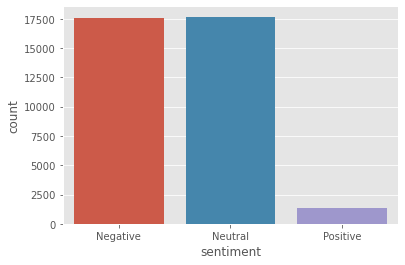

In [57]:
sns.countplot(x='sentiment', data=roberta)

In [64]:
c = roberta.groupby('sentiment').count()
c = c['roberta_neg']

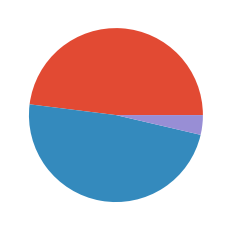

In [65]:
plt.pie(c)
plt.show()

## USING THE ROBERTA PIPELINE :)

In [1]:
from transformers import pipeline

In [2]:
test = ['I love you so much', 'I hate this guy']

pip = pipeline('sentiment-analysis')
pip(test)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998691082000732},
 {'label': 'NEGATIVE', 'score': 0.9992210865020752}]